### Metrics TR-MSE

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tnrange, tqdm_notebook
from utils import nn_verification, tr_mse, tr_mse_nn_output, load_generator
from models import g_unet, discriminator

Using TensorFlow backend.


In [37]:
models_path = 'trained_models/dust'
trend_num = 1
nn_name = 'nf100_eta5_3x3'
W = 256
H = 256
AA = 1
r = 1
l_0 = 1
l_1 = 50

In [38]:
f_gen = load_generator(models_path, trend_num, nn_name)

ResourceExhaustedError: OOM when allocating tensor with shape[3,3,800,1600]
	 [[Node: conv2d_transpose_11/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=3978719, _device="/job:localhost/replica:0/task:0/gpu:0"](conv2d_transpose_11/random_uniform/shape)]]

Caused by op 'conv2d_transpose_11/random_uniform/RandomUniform', defined at:
  File "/home/ysbudakyan/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-38-a82bd0cff9ba>", line 1, in <module>
    f_gen = load_generator(models_path, trend_num, nn_name)
  File "/media/ysbudakyan/MID/Projects/diploma-texture-synthesis/code/utils.py", line 262, in load_generator
    f_gen = load_model(path + '/' + nn_name + '/f_gen.h5')
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/keras/models.py", line 240, in load_model
    model = model_from_config(model_config, custom_objects=custom_objects)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/keras/models.py", line 304, in model_from_config
    return layer_module.deserialize(config, custom_objects=custom_objects)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/keras/layers/__init__.py", line 54, in deserialize
    printable_module_name='layer')
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/keras/utils/generic_utils.py", line 140, in deserialize_keras_object
    list(custom_objects.items())))
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/keras/engine/topology.py", line 2416, in from_config
    process_layer(layer_data)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/keras/engine/topology.py", line 2411, in process_layer
    layer(input_tensors[0], **kwargs)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/keras/engine/topology.py", line 558, in __call__
    self.build(input_shapes[0])
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/keras/layers/convolutional.py", line 728, in build
    constraint=self.kernel_constraint)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 88, in wrapper
    return func(*args, **kwargs)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/keras/engine/topology.py", line 391, in add_weight
    weight = K.variable(initializer(shape), dtype=dtype, name=name)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/keras/initializers.py", line 208, in __call__
    dtype=dtype, seed=self.seed)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 3379, in random_uniform
    dtype=dtype, seed=seed)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/random_ops.py", line 236, in random_uniform
    shape, dtype, seed=seed1, seed2=seed2)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_random_ops.py", line 263, in _random_uniform
    seed=seed, seed2=seed2, name=name)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[3,3,800,1600]
	 [[Node: conv2d_transpose_11/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=3978719, _device="/job:localhost/replica:0/task:0/gpu:0"](conv2d_transpose_11/random_uniform/shape)]]


In [29]:
K = (l_1 - l_0) / (W * AA)
def l0(x):
    return l_0

def l1(x):
    return l_1

def l_trend(x):
    return l_0 + K * x

In [30]:
nn_verification(models_path, trend_num, nn_name, f_gen, 20, W, H, l0, l1, l_trend, AA, r, False)

Verification: 100%|██████████| 20/20 [00:31<00:00,  1.57s/it]

NN output saved successfully.


In [31]:
verification_path = models_path + '/trend' + str(trend_num) + '/' + nn_name + '/verification'
nn_mse, nn_err, nn_tr, tr_side1, tr_side2, tr_pan  = tr_mse_nn_output(verification_path, r=1)

NN output: 100%|██████████| 20/20 [00:00<00:00, 22.91it/s]

Metrics saved successfully.


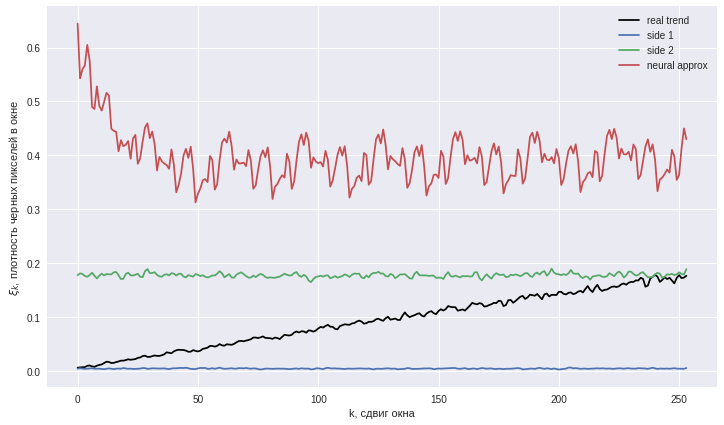

In [32]:
plt.figure(figsize=(12, 7))
plt.plot(tr_pan, label='real trend', color='black')
plt.plot(tr_side1, label='side 1')
plt.plot(tr_side2, label='side 2')
plt.plot(nn_tr, label='neural approx')
plt.xlabel('k, сдвиг окна')
plt.ylabel(r'$\xi_k$, плотность черных пикселей в окне')
plt.legend()
plt.savefig(verification_path + '/metrics' + '/tr_1.png')